In [19]:
import random
import matplotlib.pyplot as plt

In [27]:
def get_list_of_n_points(n):
    l=[]
    for i in range(n):
        x_rand = random.randint(0,50)
        y_rand = random.randint(0,50)
        l.append((x_rand, y_rand))
    return l

In [28]:
list_of_points = get_list_of_n_points(15)

In [40]:
def plot_list(list_of_points, list_of_k_points):
    plt.scatter(*zip(*list_of_points), c="blue")
    
    if list_of_k_points!=[]:
        plt.scatter(*zip(*list_of_k_points), c="red")
    plt.show()

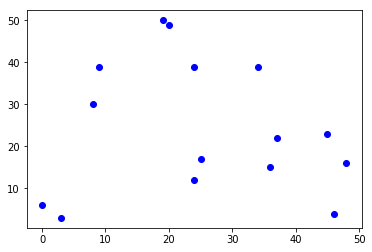

In [41]:
plot_list(list_of_points, [])

In [ ]:
def new_iteration(list_of_points, list_of_k_points):
    for k_point in list_of_k_points:
        

In [42]:
def k_means(k, list_of_points):
    list_of_k_points = get_list_of_n_points(k)
    plot_list(list_of_points, list_of_k_points)
    
    list_of_k_points = new_iteration(list_of_points, list_of_k_points)

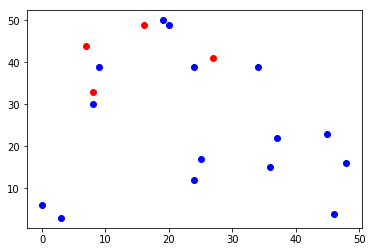

In [43]:
k_means(4, list_of_points)